In scikit-learn, import the Iris dataset, it is a great classic of data. It contains 3 species of flowers (irises) according to their length and width of petal and sepal.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

df_iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Train your model to find 3 clusters, from the 4 numeric columns.

In [ ]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
X = df_iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']]

modelKM = KMeans(n_clusters=3)
modelKM.fit(X)

KMeans(n_clusters=3)

In [ ]:
centers = modelKM.cluster_centers_
centers


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
df_iris["cluster"] = modelKM.labels_

Produce a visualization comparing the basic dataset with the classes generated by the K-means using this image as inspiration. You can display 2 features of your choice among the 4.

*   On the graph on the left, you have to display the points with different colors 
for each cluster you belong to, as well as the center of each cluster prominently.
*   On the right graph, you must display the points with different colors corresponding to their iris species.

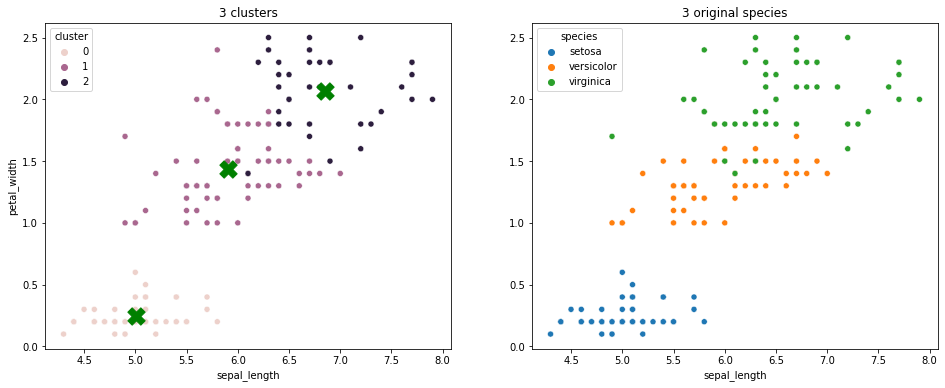

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('3 clusters')

sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax1, hue="cluster")
ax1.scatter(centers[:,   0], centers[:,3],s = 300, c = 'green', marker="X")

ax2.set_title('3 original species')
ax2.set(ylabel=' ')
sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax2, hue="species")

Draw another model with 2 clusters, then displays the same graphs

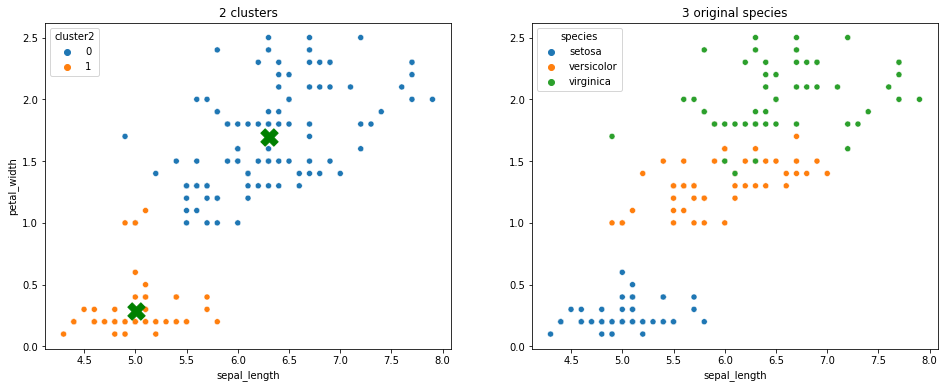

In [ ]:
modelKM = KMeans(n_clusters=2)
modelKM.fit(X)
centers = modelKM.cluster_centers_

df_iris["cluster2"] = modelKM.labels_

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('2 clusters')

sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax1, hue="cluster2")
ax1.scatter(centers[:,   0], centers[:,3],s = 300, c = 'green', marker="X")

ax2.set_title('3 original species')
ax2.set(ylabel=' ')
sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax2, hue="species")

Same for 4 clusters

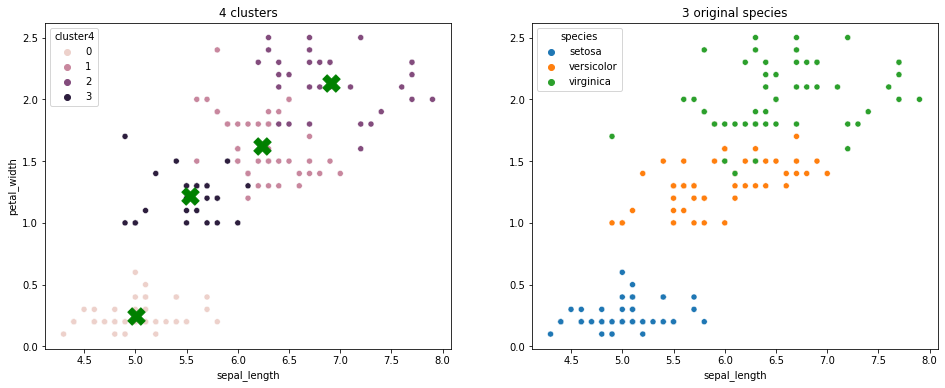

In [ ]:
modelKM = KMeans(n_clusters=4)
modelKM.fit(X)
centers = modelKM.cluster_centers_

df_iris["cluster4"] = modelKM.labels_

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('4 clusters')

sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax1, hue="cluster4")
ax1.scatter(centers[:,   0], centers[:,3],s = 300, c = 'green', marker="X")

ax2.set_title('3 original species')
ax2.set(ylabel=' ')
sns.scatterplot(x='sepal_length', y='petal_width', data=df_iris, ax=ax2, hue="species")

Evaluate your model using the Elbow method, between 2 and 10 clusters, which cluster number seems optimal?

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.9440683605553906
2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5577656519366712
5 : 0.5096521951118286
6 : 0.46619760937409505
7 : 0.436368538544801
8 : 0.4108698632459713
9 : 0.4037981465941124
10 : 0.3836556351470873


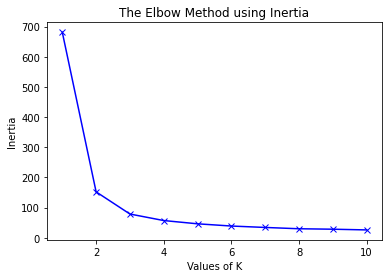

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Evaluate your model using the Silhouette method, between 2 and 10 clusters

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
    modelKM = KMeans(n_clusters=k)
    modelKM.fit(X)
    print(silhouette_score(X, modelKM.labels_))

0.6810461692117465
0.5528190123564102
0.49805050499728815
0.48874888709310654
0.3587652154907778
0.3480748657529199
0.339283595686517
0.31376119083678344
0.30523535749743813


which cluster number seems optimal?

In [ ]:
#2 clusters seem optimal

And you, visually, if you didn't know there were 3 species, how many would you have found?

In [ ]:
 #I think I would have found 2 clusters